In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
train = pd.read_csv('insurance_training.csv')
test = pd.read_csv('insurance_test.csv')

In [3]:
train.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,BMI_group,charges
0,560,46,0,19.95,2,0,1,1,9193.83850
1,1285,47,0,24.32,0,0,0,1,8534.67180
2,1142,52,0,24.86,0,0,2,1,27117.99378
3,969,39,0,34.32,5,0,2,2,8596.82780
4,486,54,0,21.47,3,0,1,1,12475.35130


In [6]:
def bmi_group(bmi):
    if bmi < 18.5:
        return 'Underweight' 
    elif bmi <= 24.9:
        return 'Normal'
    elif bmi <= 29.9:
        return 'Overweight'
    return 'Obese'

train['BMI_group'] = train['bmi'].apply(bmi_group)
def encode_categorical():
    le = LabelEncoder()#use this encoder to encode values
    train['smoker'] = le.fit_transform(train['smoker'])
    train['sex'] = le.fit_transform(train['sex'])
    train['region'] = le.fit_transform(train['region'])
    # df['age'] = le.fit_transform(df['age'])
    train['BMI_group'] = le.fit_transform(train['BMI_group'])
    return

encode_categorical()
print(train.head())

   Unnamed: 0  age  sex    bmi  children  smoker  region  BMI_group  \
0         560   46    0  19.95         2       0       1          0   
1        1285   47    0  24.32         0       0       0          0   
2        1142   52    0  24.86         0       0       2          0   
3         969   39    0  34.32         5       0       2          1   
4         486   54    0  21.47         3       0       1          0   

       charges  
0   9193.83850  
1   8534.67180  
2  27117.99378  
3   8596.82780  
4  12475.35130  


In [8]:
print(round(train['smoker'].corr(train['bmi']),4))
print(round(train['smoker'].corr(train['age']),4))
print(round(train['smoker'].corr(train['charges']),4))

-0.0035
-0.052
0.7801


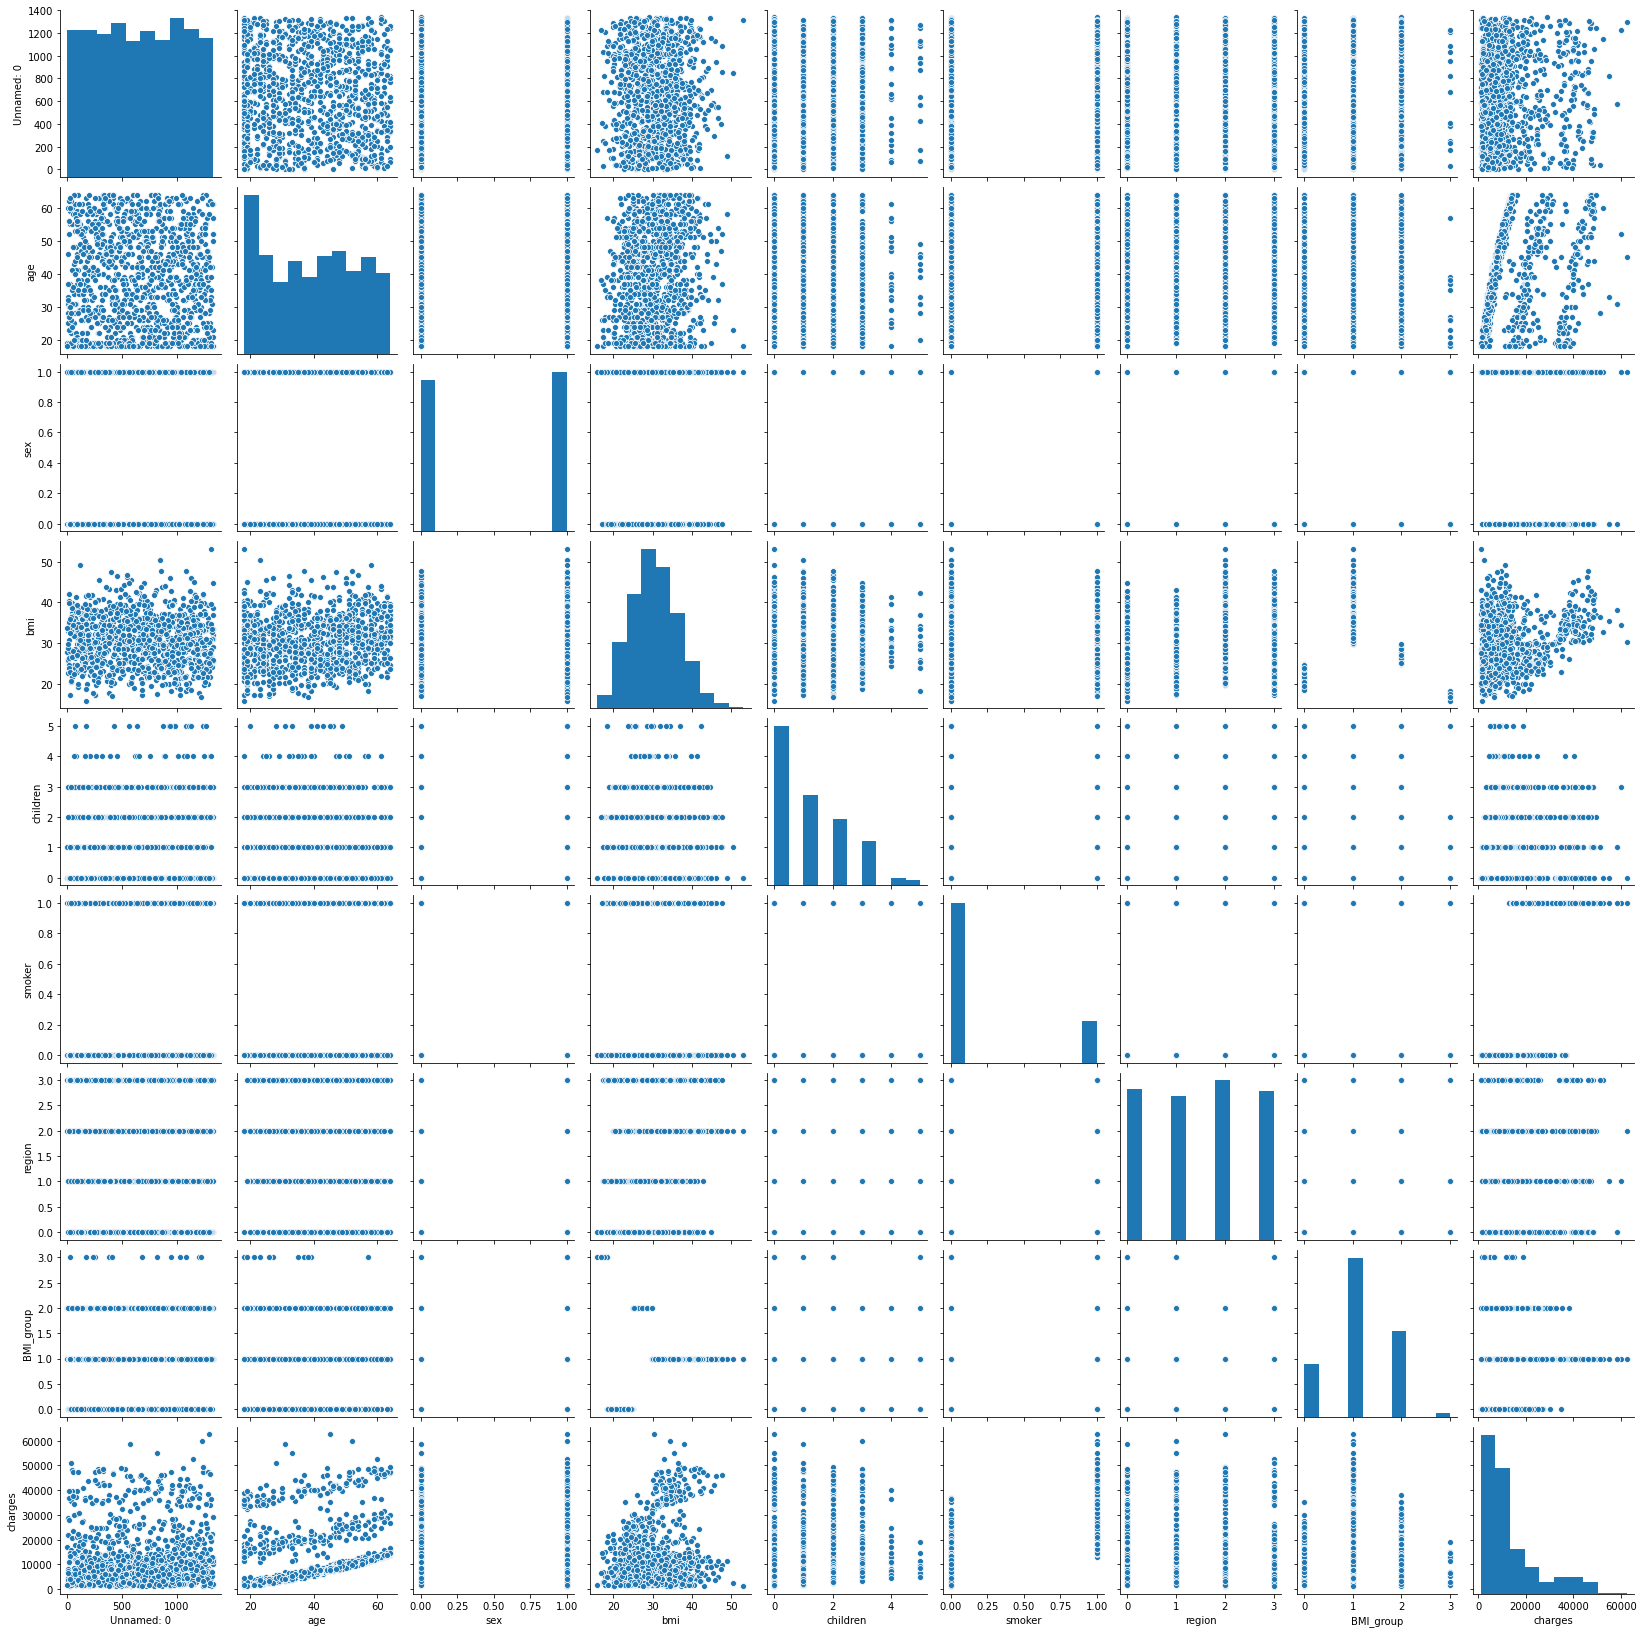

In [29]:
sns.pairplot(train)

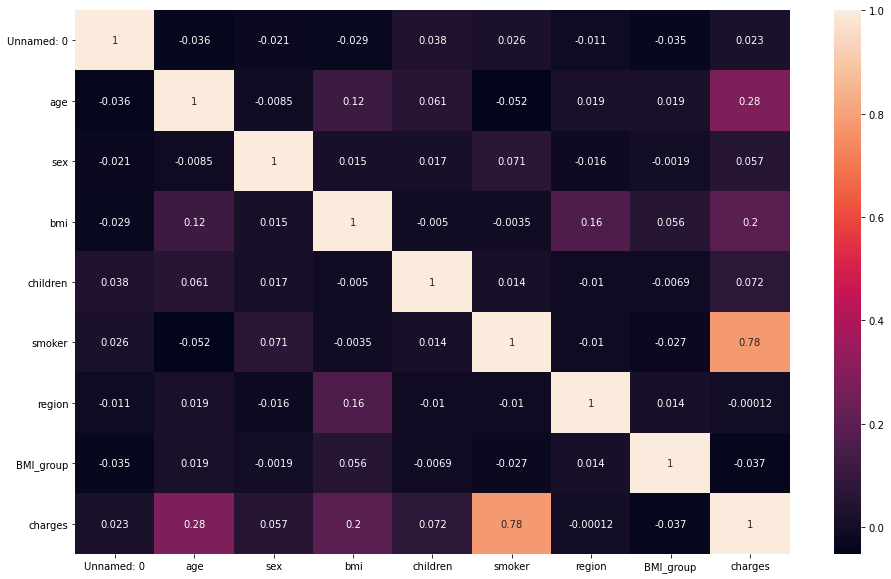

In [28]:
plot.figure(figsize = (16,10))
sns.heatmap(train.corr(),annot= True)
# plot.show()

In [11]:
# MODEL 1

X_train = train['smoker'].values.reshape(-1,1)
X_test = test['smoker'].values.reshape(-1,1)

model = LinearRegression().fit(X_train,train['charges'])
y_test_pred = model.predict(X_test)


X = sm.add_constant(X_train)
# create a fitted model in one line
lm_1 = sm.OLS(train['charges'],X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1660.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          1.04e-219
Time:                        02:28:03   Log-Likelihood:                -11068.
No. Observations:                1070   AIC:                         2.214e+04
Df Residuals:                    1068   BIC:                         2.215e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8578.3225    258.076     33.240      0.0

In [12]:
# MODEL 2

X_train = train[['age','smoker']]
X_test = test[['age','smoker']]

model = LinearRegression().fit(X_train,train['charges'])
y_test_pred = model.predict(X_test)


X = sm.add_constant(X_train)
# create a fitted model in one line
lm_2 = sm.OLS(train['charges'],X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1323.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          1.12e-289
Time:                        02:29:03   Log-Likelihood:                -10902.
No. Observations:                1070   AIC:                         2.181e+04
Df Residuals:                    1067   BIC:                         2.183e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2387.3678    599.825     -3.980      0.0

In [13]:
# MODEL 3

X_train = train[['age','smoker','bmi']]
X_test = test[['age','smoker','bmi']]

model = LinearRegression().fit(X_train,train['charges'])
y_test_pred = model.predict(X_test)


X = sm.add_constant(X_train)
# create a fitted model in one line
lm_3 = sm.OLS(train['charges'],X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1007.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          1.65e-310
Time:                        02:30:08   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1066   BIC:                         2.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.171e+04   1061.511    -11.029      0.0

In [30]:
# MODEL 4

X_train = train[['smoker','bmi']]
X_test = test[['smoker','bmi']]

model = LinearRegression().fit(X_train,train['charges'])
y_test_pred = model.predict(X_test)


X = sm.add_constant(X_train)
# create a fitted model in one line
lm_3 = sm.OLS(train['charges'],X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     984.3
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          5.63e-243
Time:                        02:39:50   Log-Likelihood:                -11010.
No. Observations:                1070   AIC:                         2.203e+04
Df Residuals:                    1067   BIC:                         2.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3582.6389   1130.360     -3.169      0.0

In [35]:
# MODEL 5

X_train = train[['age','smoker','bmi']]
X_test = test[['age','smoker','bmi']]
scaler = MinMaxScaler()
var = ['age','bmi']
X_train[var] = scaler.fit_transform(X_train[var])

model = LinearRegression().fit(X_train,train['charges'])
y_test_pred = model.predict(X_test)


X = sm.add_constant(X_train)
# create a fitted model in one line
lm_5 = sm.OLS(train['charges'],X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1007.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          1.65e-310
Time:                        02:44:10   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1066   BIC:                         2.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1828.2729    554.921     -3.295      0.0

n:\python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
n:\python\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bmi,2.91
0,age,2.74
1,smoker,1.21
